In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### 1

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания).

In [3]:
data = pd.read_csv('owid-covid-data.csv')

In [4]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
data = data[
    (data['iso_code'] == 'RUS') &
    (data['date'] >= '2020-03-03')][['date', 'total_cases', 'new_cases']]

data['new_cases'] = data['new_cases'].replace(0, 1)

In [7]:
data.reset_index(drop=True, inplace=True)

In [8]:
X_train = np.arange(0, 50).reshape(-1, 1)
X_test = np.arange(50, data.shape[0]).reshape(-1, 1)

y_new_train = data.iloc[:50][['new_cases']]
y_new_test = data.iloc[50:][['new_cases']]

y_total_train = data.iloc[:50][['total_cases']]
y_total_test = data.iloc[50:][['total_cases']]

#### 2

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально

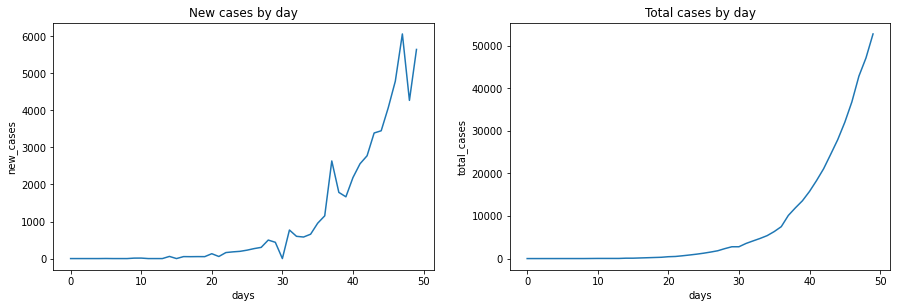

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(y_new_train)
plt.xlabel('days')
plt.ylabel('new_cases')
plt.title('New cases by day')

plt.subplot(222)
plt.plot(y_total_train)
plt.xlabel('days')
plt.ylabel('total_cases')
plt.title('Total cases by day');

In [10]:
y_new_log_train = np.log(y_new_train)
y_new_log_test = np.log(y_new_test)
y_total_log_train = np.log(y_total_train)
y_total_log_test = np.log(y_total_test)

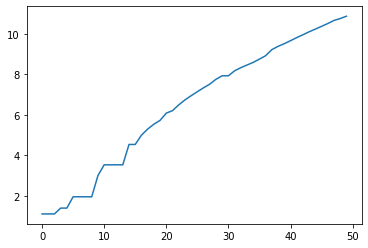

In [11]:
plt.plot(X_train, y_total_log_train)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model_new = LinearRegression()
model_total = LinearRegression()

model_new.fit(X_train, y_new_log_train)
model_total.fit(X_train, y_total_log_train)

LinearRegression()

In [14]:
y_new_pred = model_new.predict(X_test)
y_total_pred = model_total.predict(X_test)

ValueError: x and y must have same first dimension, but have shapes (1051, 1) and (150,)

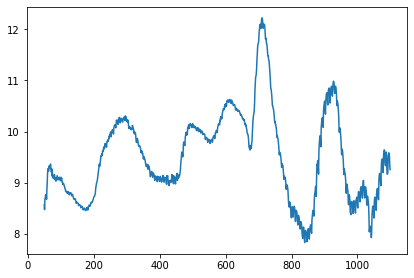

In [63]:
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(X_test, y_new_log_test)
plt.plot(X_test, y_new_pred, c='r')
plt.xlabel('days')
plt.title("X_test")
plt.ylabel('log(new_cases)')

plt.subplot(222)
plt.plot(X_test, y_total_log_test)
plt.plot(X_test, y_total_pred, c='r')
plt.xlabel('days')
plt.title("X_test")
plt.ylabel('log(total_cases)');

На тестовой выборке очень плохая точность, а на тренировочной наоборот

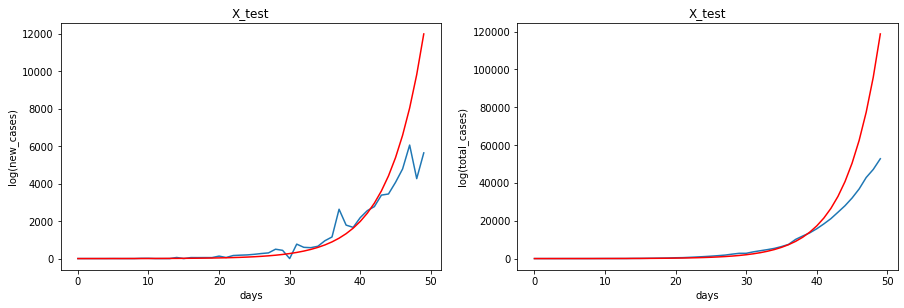

In [60]:
y_new_pred_train = model_new.predict(X_train)
y_total_pred_train = model_total.predict(X_train)

plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.plot(X_train, np.exp(y_new_log_train))
plt.plot(X_train, np.exp(y_new_pred_train), c='r')
plt.xlabel('days')
plt.title("X_train")
plt.ylabel('new_cases')

plt.subplot(222)
plt.plot(X_train, np.exp(y_total_log_train))
plt.plot(X_train, np.exp(y_total_pred_train), c='r')
plt.xlabel('days')
plt.title("X_train")
plt.ylabel('total_cases');

In [17]:
print('interception:', model_total.intercept_[0], 'bias:', model_total.coef_[0][0])

interception: 1.1934192756385702 bias: 0.21410636658252818


In [18]:
from sklearn.metrics import mean_squared_error
sigma_0 = 2
model_noise = mean_squared_error(y_total_pred_train, y_total_log_train )
day0 = np.ones_like(X_train)
X = np.hstack([day0, X_train]) 

sigma = np.linalg.inv(np.eye(2) / sigma_0 + (X.T.dot(X)) / model_noise)
mu = sigma.dot(X.T.dot(y_total_log_train) / model_noise)

In [19]:
mu.squeeze()

array([1.18416525, 0.21438625])

In [20]:
from scipy.stats import multivariate_normal

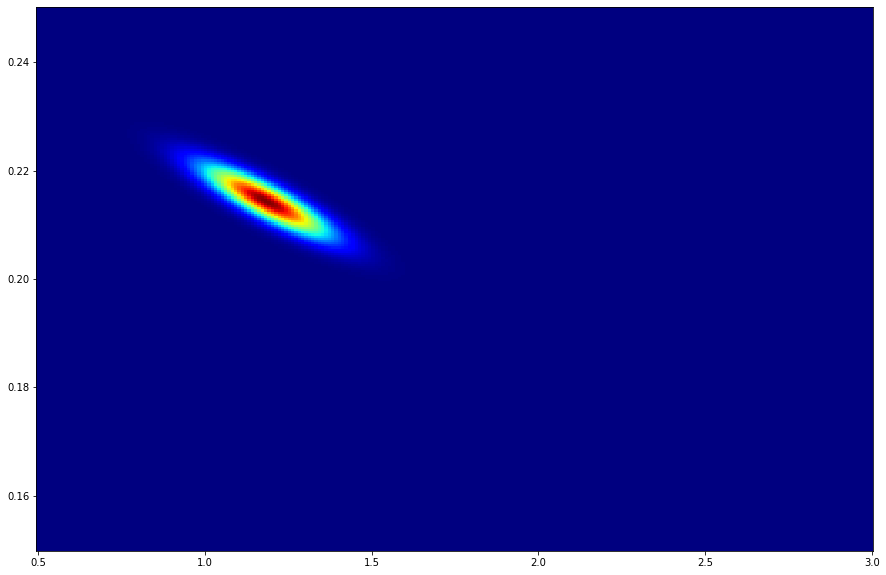

In [21]:
N = 250
X = np.linspace(0.5, 3, N)
Y = np.linspace(0.15, 0.25, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_normal.pdf(pos, mean=mu.squeeze(), cov=sigma)

plt.figure(figsize=(15, 10))
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet, shading='auto');

In [22]:
sample = multivariate_normal.rvs(mean=mu.squeeze(), cov=sigma, size=100)

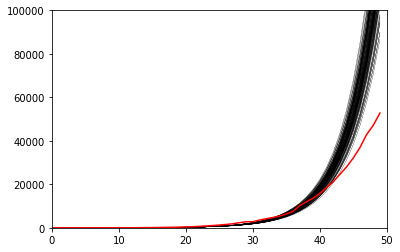

In [23]:
y_preds = []
size = 50
plt.ylim(0, 1e5)
plt.xlim(0, 50)

for params in sample:
    y_new_pred = np.exp(params[1] * X_train[:size] + params[0])

    plt.plot(X_train[:size], y_new_pred, c='black', lw=.3)
plt.plot(X_train[:size], y_total_train[:size], c='red');

In [24]:
start = pd.to_datetime('2020-03-03')
days_to_may1 = (pd.to_datetime('2020-05-01') - start).days
days_to_june1 = (pd.to_datetime('2020-06-01') - start).days
days_to_sept1 = (pd.to_datetime('2020-09-01') - start).days

dates = np.array([days_to_may1, days_to_june1, days_to_sept1])

predicts = []
for params in sample:
    predict = np.exp(params[1] * dates + params[0])
    predicts.append(predict)
true_values = data['total_cases'][dates]

predicts = np.array(predicts)

mu = predicts.mean(axis=0)
sigma = predicts.std(axis=0)



In [26]:
compare_df = pd.DataFrame(
    data.iloc[dates][['date', 'total_cases']].values,
    columns=['date', 'real_values'],
    )
compare_df['predicted'] = mu
compare_df['std'] = sigma

In [27]:
compare_df

,date,real_values,predicted,std
0,2020-05-01,114431.0,1.064688e+06,1.854895e+05
1,2020-06-01,414878.0,8.616567e+08,2.578349e+08
2,2020-09-01,1000048.0,4.045379e+17,2.726734e+17


#### 3

Пользуемся тем, что new cases это производная от временного ряда total cases

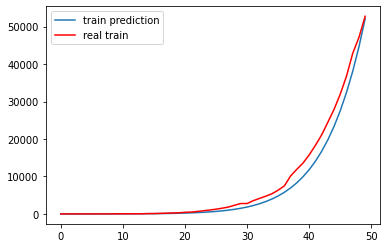

In [30]:
day2 = np.square(X_train)
X = np.hstack([X_train, day2]) 

day2_test = np.square(X_test)
X_test_2 = np.hstack([X_test, day2_test]) 

model_sigmoid = LinearRegression().fit(X, y_new_log_train)
y_total_pred_train = np.cumsum(np.exp(model_sigmoid.predict(X)))

plt.plot(X_train, y_total_pred_train, label="train prediction")
plt.plot(X_train, y_total_train, c='r', label="real train")

plt.legend();

In [32]:
sigma_0 = 2
model_noise = mean_squared_error(model_sigmoid.predict(X), y_new_log_train)
day0 = np.ones_like(X_train)
X = np.hstack([day0, X])

sigma = np.linalg.inv(np.eye(3) / sigma_0 + (X.T.dot(X)) / model_noise)
mu = sigma.dot(X.T.dot(y_new_log_train) / model_noise)

In [33]:
mu.squeeze()

array([-0.77760687,  0.2505384 , -0.00105931])

In [34]:
sample = multivariate_normal.rvs(mean=mu.squeeze(), cov=sigma, size=100)

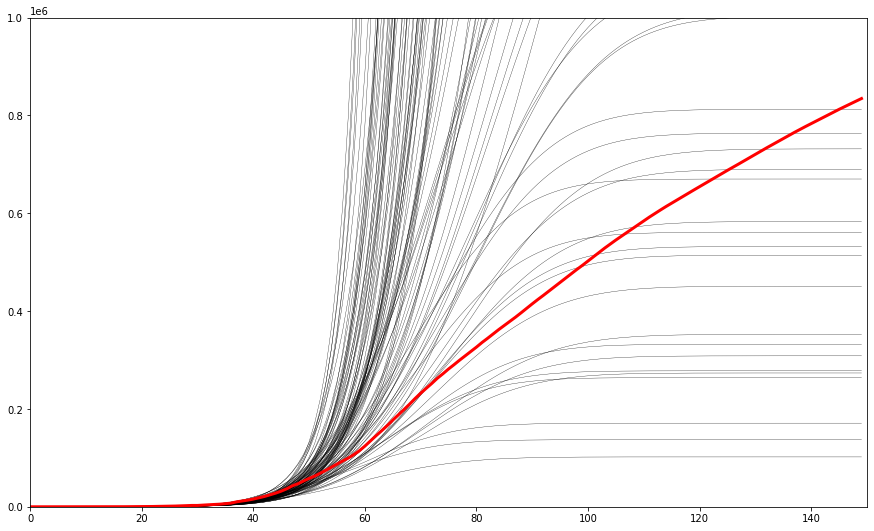

In [58]:
y_preds = []
size = 150
plt.figure(figsize=(15, 9))
plt.ylim(0, 1e6)
plt.xlim(0, size)
X = np.vstack([X_train, X_test])[:size]
day2 = np.square(X)
X = np.hstack([X, day2]) 

for params in sample:
    model = LinearRegression()
    model.coef_ = params[1:]
    model.intercept_ = params[0]
    
    y_new_pred = np.cumsum(np.exp(model.predict(X)))

    plt.plot(X[:, 0], y_new_pred, c='black', lw=.3)

plt.plot(X[:, 0], data['total_cases'][:size], c='red', lw=3);

In [66]:
start = pd.to_datetime('2020-03-03')
days_to_may1 = (pd.to_datetime('2020-05-01') - start).days
days_to_june1 = (pd.to_datetime('2020-06-01') - start).days
days_to_sept1 = (pd.to_datetime('2020-09-01') - start).days

dates = np.array([[days_to_may1, days_to_may1**2],
                  [days_to_june1, days_to_june1**2],
                  [days_to_sept1, days_to_sept1**2]])

predicts = []
for params in sample:
    model = LinearRegression()
    model.coef_ = params[1:]
    model.intercept_ = params[0]
    
    y_new_pred = np.cumsum(np.exp(model.predict(dates)))
    predicts.append(predict)
true_values = data['total_cases'][dates[:, 0]]

predicts = np.array(predicts)

mu = predicts.mean(axis=0)
sigma = predicts.std(axis=0)

In [67]:
compare_df = pd.DataFrame(
    data.iloc[dates[:, 0]][['date', 'total_cases']].values,
    columns=['date', 'real_values'],
    )
compare_df['predicted'] = mu
compare_df['std'] = sigma

In [68]:
compare_df

,date,real_values,predicted,std
0,2020-05-01,114431.0,8.955511e+05,3.492460e-10
1,2020-06-01,414878.0,6.082120e+08,7.152557e-07
2,2020-09-01,1000048.0,1.543814e+17,1.600000e+02
